<a href="https://www.kaggle.com/code/farhakhaledahmed/plantdisease?scriptVersionId=235118443" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

print("Loaded required libraries...")


2025-04-20 23:09:51.234536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-20 23:09:51.234645: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-20 23:09:51.363628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loaded required libraries...


In [2]:
fpath = "../input/plantdisease/PlantVillage/"
random_seed = 111

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus'] 

No. of categories =  15


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(fpath+"/"+category+"/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                img_array = Image.fromarray(img, 'RGB')

                #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))


No. of images loaded =  4352 
No. of labels loaded =  4352
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (4352, 227, 227, 3) 
Labels shape =  (4352,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


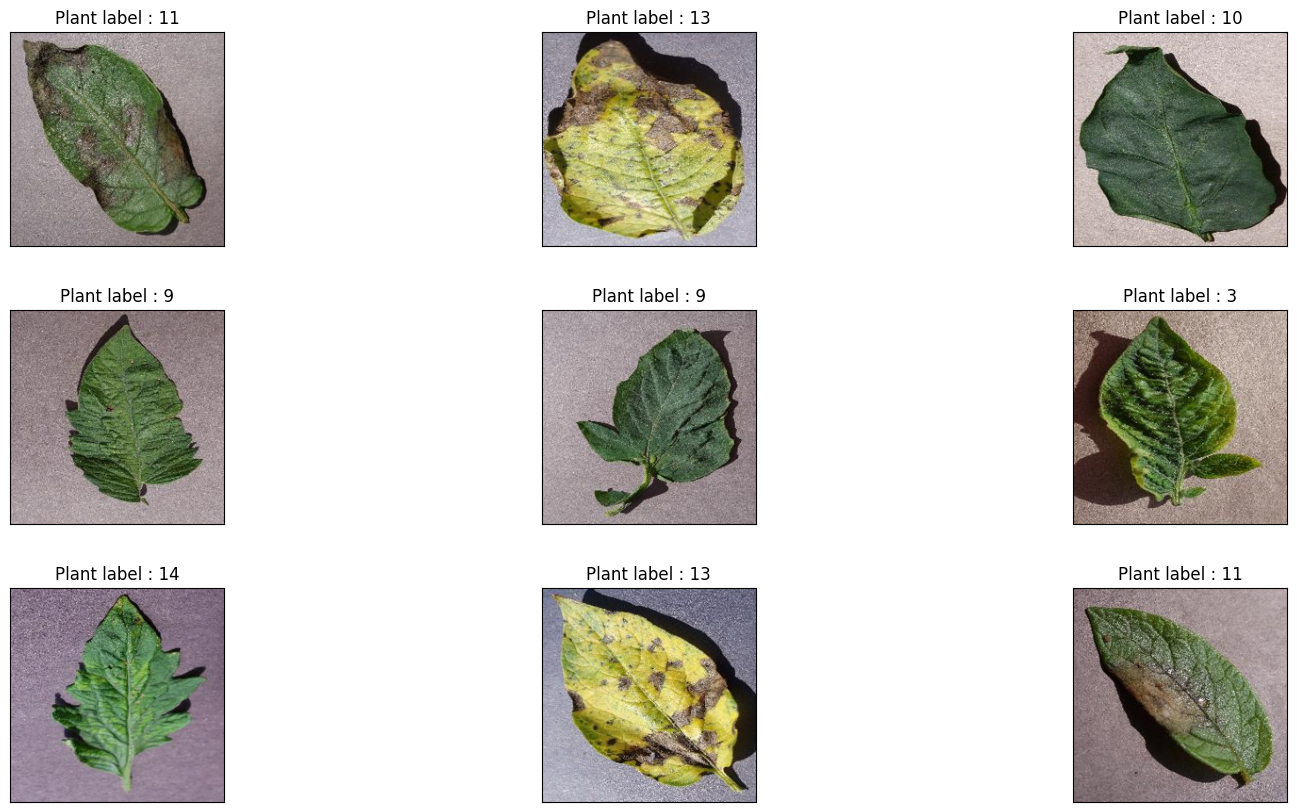

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)


In [6]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 4349 4350 4351]

'n' values after shuffling =  [3063 2450 3854 ... 4182 2004 3924]


In [7]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)


Images shape after shuffling =  (4352, 227, 227, 3) 
Labels shape after shuffling =  (4352,)


In [8]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (4352, 227, 227, 3)


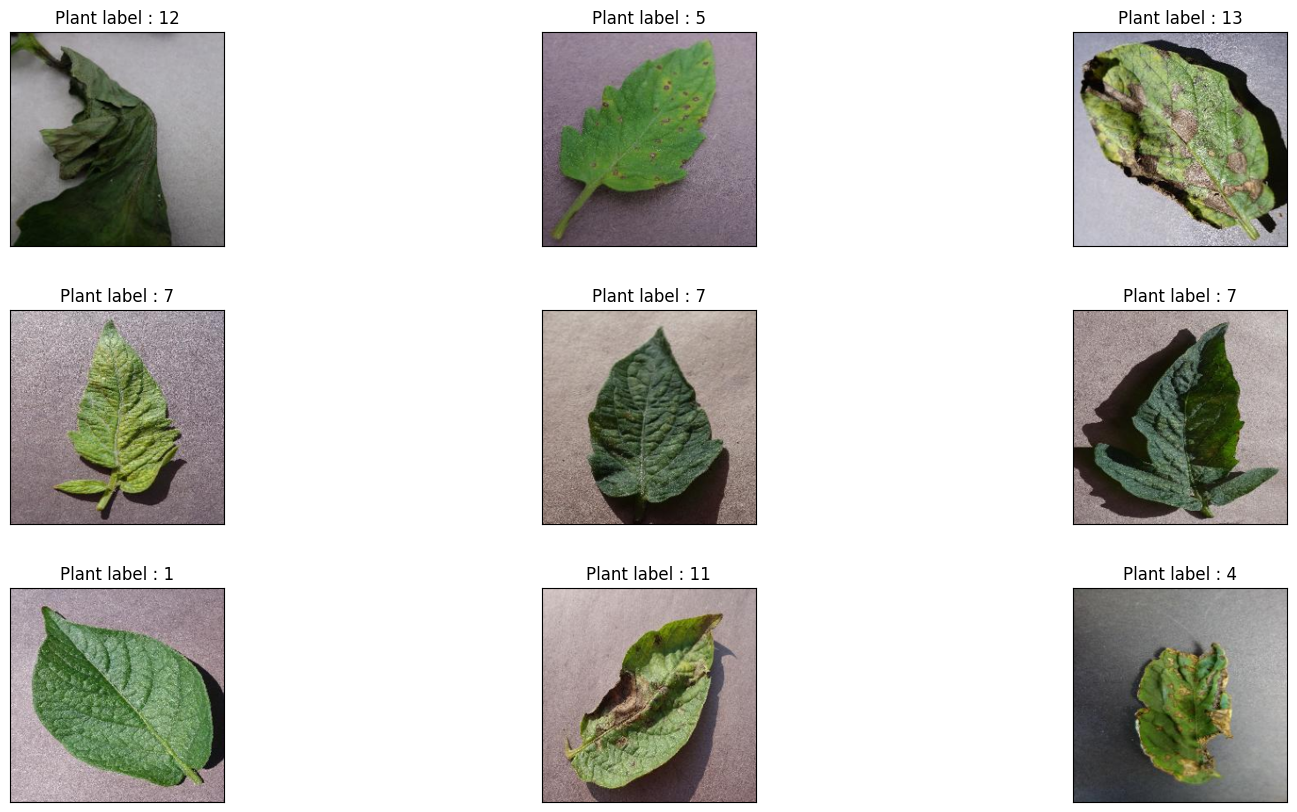

In [9]:
display_rand_images(images, labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (3481, 227, 227, 3)
y_train shape =  (3481,)

x_test shape =  (871, 227, 227, 3)
y_test shape =  (871,)


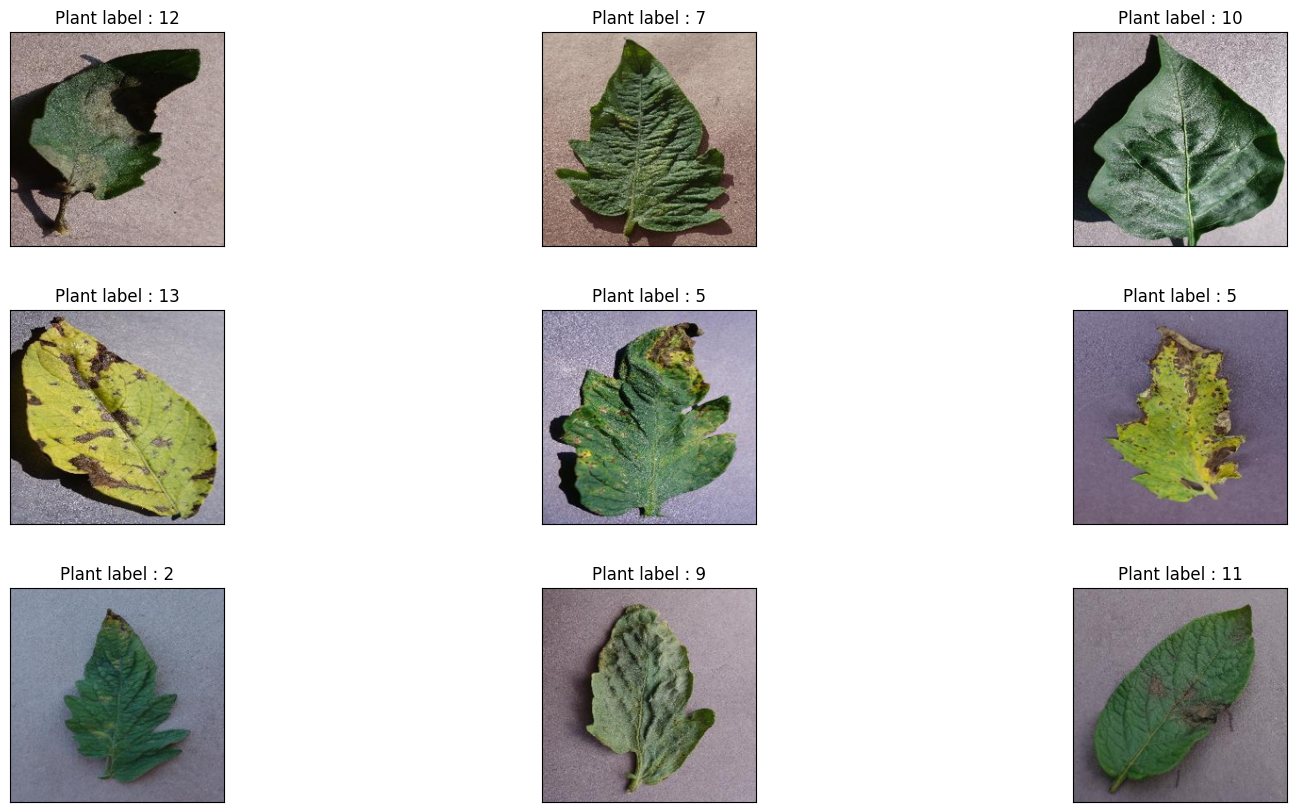

In [11]:
display_rand_images(x_train, y_train)

In [12]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │        20,02

 Total params: 28,883,132 (110.18 MB)

 Trainable params: 28,863,532 (110.11 MB)

 Non-trainable params: 19,600 (76.56 KB)

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
  5/109 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1043 - loss: 3.8875

I0000 00:00:1745190674.091277      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


109/109 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - accuracy: 0.1796 - loss: 3.2654
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4057 - loss: 2.0213
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4995 - loss: 1.6535
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5743 - loss: 1.2925
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6630 - loss: 1.0611
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6872 - loss: 0.9232
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6994 - loss: 0.8903
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7408 - loss: 0.7619
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7654 - loss: 0.6748
Epoch 10/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7764 - loss: 0.6768
Epoch 11/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7970 - loss: 0.6030
Epoch 12/100
109/109 ━━━━━━━━━━━━━━━━━━━

In [15]:
# Evaluate the model
loss, accuracy =model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6607 - loss: 56.3243
Test Loss: 787.9462280273438
Test Accuracy: 0.6440872550010681


In [16]:
pred = model.predict(x_test)

pred.shape

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


(871, 20)

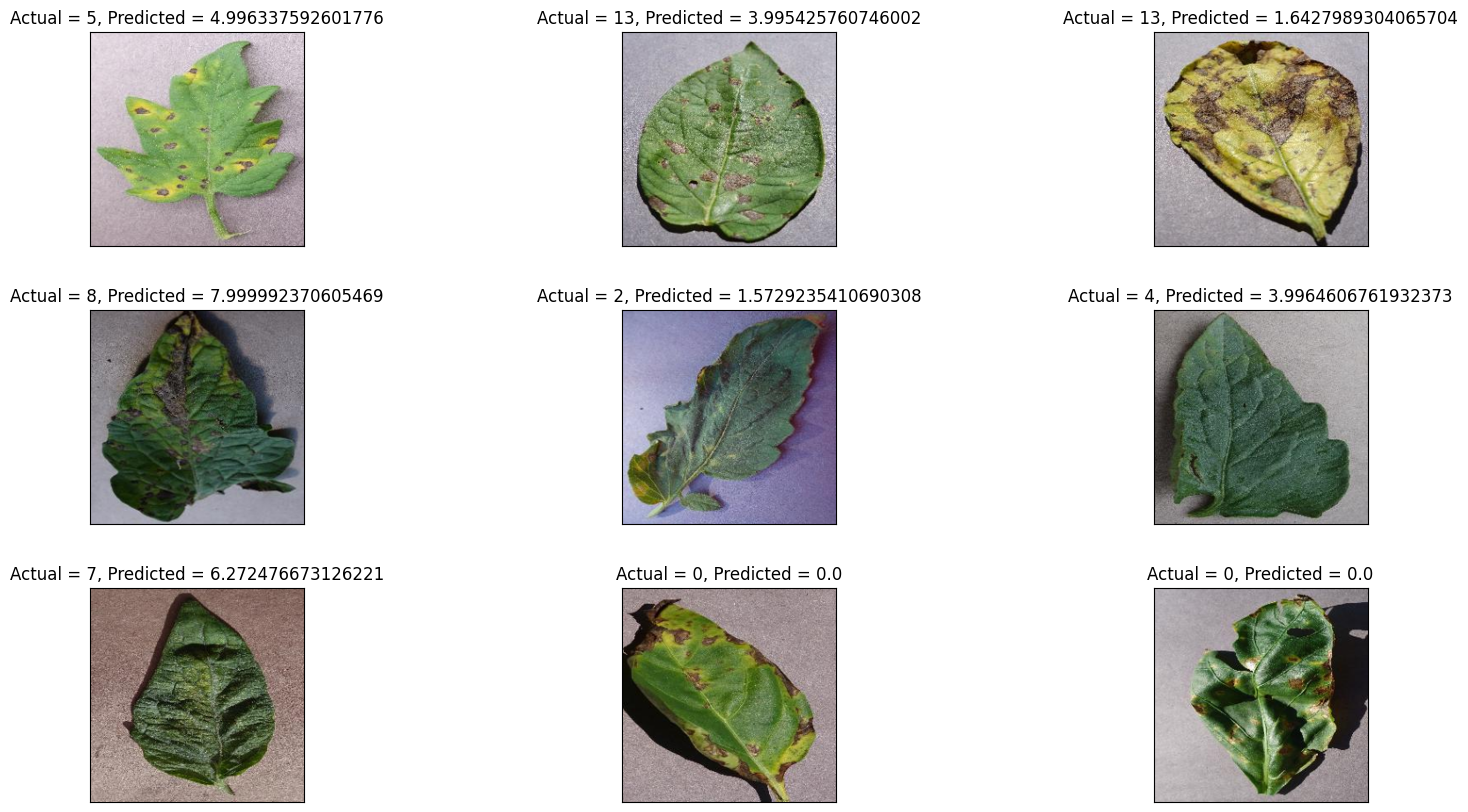

In [17]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [18]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def AlexNet(input_shape=(227, 227, 3), num_classes=20):
    inputs = Input(shape=input_shape)

    # 1st Convolutional Layer
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid')(inputs)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = BatchNormalization()(x)

    # 2nd Convolutional Layer
    x = Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = BatchNormalization()(x)

    # 3rd Convolutional Layer
    x = Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)

    # 4th Convolutional Layer
    x = Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)

    # 5th Convolutional Layer
    x = Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = BatchNormalization()(x)

    # Flatten the output before fully connected layers
    x = Flatten()(x)

    # 1st Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    # 2nd Fully Connected Layer
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    # 3rd Fully Connected Layer
    x = Dense(1000, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)

    # Output Layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create an instance of the model
alexnet_model = AlexNet(input_shape=(227, 227, 3), num_classes=20)

# Compile the model
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
alexnet_model.fit(x_train, y_train, epochs=100)

# Evaluate the model
loss, accuracy = alexnet_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
  5/109 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.0809 - loss: 3.6010

W0000 00:00:1745190982.971720      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


109/109 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - accuracy: 0.2728 - loss: 2.8077
Epoch 2/100
  3/109 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4757 - loss: 1.4315

W0000 00:00:1745190996.987447      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.4832 - loss: 1.6988
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5941 - loss: 1.3057
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6415 - loss: 1.1265
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6764 - loss: 0.9789
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7341 - loss: 0.7815
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7727 - loss: 0.6676
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7919 - loss: 0.6250
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8057 - loss: 0.5752
Epoch 10/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8320 - loss: 0.4759
Epoch 11/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8400 - loss: 0.4866
Epoch 12/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8821 - loss: 0.3435
Epoch 13/100
109/109 ━━━━━━━━━━━━━━━━━━━━

W0000 00:00:1745191361.194470      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7189 - loss: 3034.6318
Test Loss: 43973.2734375
Test Accuracy: 0.708381175994873


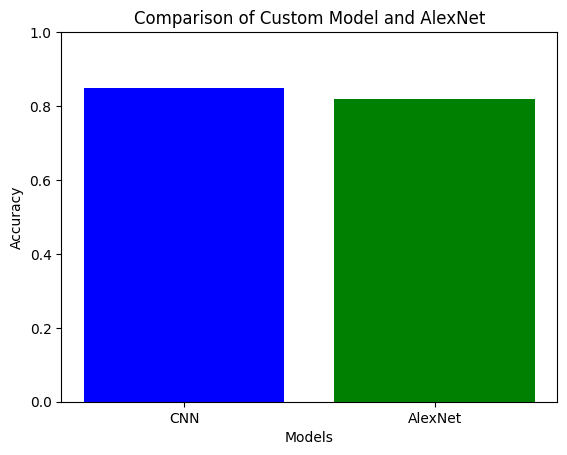

In [19]:
import matplotlib.pyplot as plt

# Assuming accuracy scores are available for both models
accuracy_custom_model = 0.85  # Replace with actual accuracy
accuracy_alexnet = 0.82  # Replace with actual accuracy

models = ['CNN', 'AlexNet']
accuracies = [accuracy_custom_model, accuracy_alexnet]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Model and AlexNet')
plt.ylim(0, 1)
plt.show()
